### 1. 라이브러리 & 데이터 리딩

In [1]:
# 수치화를 위한 라이브러리 
import pandas as pd 
import numpy as np 

# 시각화를 위한 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 방지
from matplotlib import rc
rc('font', family ='AppleGothic')

In [3]:
# 데이터 리딩 
df = pd.read_csv("data/jeju_card.csv") # 맨 앞 슬래쉬 x
df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


### 2. 결측치 및 칼럼 처리 

In [4]:
# 데이터 정보 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [5]:
df.describe()
# numeric 데이타만 

,이용자수,이용횟수,이용금액
count,19573.000000,19573.000000,1.957300e+04
mean,2987.681347,5980.462525,2.100849e+08
std,5331.172895,13623.951410,3.921408e+08
min,1.000000,1.000000,1.000000e+03
25%,254.000000,371.000000,1.765947e+07
50%,972.000000,1376.000000,7.142090e+07
75%,3169.000000,5710.000000,2.169743e+08
max,40329.000000,149274.000000,3.213235e+09


In [6]:
# 칼럼당 유니크한 요소 확인 
# non-numeric 한 features을 하나의 변수에 저장 
object_cols = df.columns[df.dtypes == 'object']
object_cols

Index(['시도명', '시군구명', '지역구분', '업종명', '이용자 구분', '연령대', '성별', '연월'], dtype='object')

In [7]:
# 오브젝트 피쳐의 유니크한 값 추출 
for col in object_cols:
    print(col, ":", df[col].unique())

시도명 : ['제주도']
시군구명 : ['제주시' '서귀포시']
지역구분 : ['읍면' '도심']
업종명 : ['유흥' '식음료' '숙박' '쇼핑' '소매' '문화/레져' '교통' '기타']
이용자 구분 : ['제주도민' '내국인관광객']
연령대 : ['60대이상' '50대' '40대' '30대' '20대미만' '20대' '20 미만']
성별 : ['여' '남']
연월 : ['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09']


- 읍/면으로 분리하지 않고 하나로 묶음 
- 도시와 읍면으로만 구분함 -> 동네별 추이 분석 필요x
- 2016/9 ~ 2018/12, 2년 4개월 데이터 존재 
- 20대 미만??이 왜있는거지.... 20대미만 안에서 20대, 20 미만으로 구분하는건가 뭐고 

In [39]:
# 결측치 확인 
df.isnull().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
연도        0
월         0
dtype: int64

- 결측치 없음 

2017-2018 데이터만 추출하기 
- 년도와 월을 구분하여 칼럼 추가하기 
- 년도가 2017, 2018인 행의 subset 만들기 

In [9]:
#년도, 월 구분하기 
df['연도'] = df['연월'].str.split('-').str[0]
df['월'] = df['연월'].str.split('-').str[1]

df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도,월
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018,12
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018,12
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018,12
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018,12
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018,12


- 년도, 월 구분하여 칼럼 생성 완료 
- 2017, 2018 데이터 추출 

In [10]:
# df_1718 생성 
# df_1718 = df[(df['연도'] == '2018') | (df['연도'] == '2017')]\
    
df_1718 = df[df['연도'].isin(['2017', '2018'])] # isin 활용 

df_1718.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액,연도,월
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100,2018,12
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000,2018,12
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000,2018,12
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500,2018,12
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600,2018,12


In [11]:
df_1718.loc[df_1718['연령대'] == '20 미만', '연령대'] = '20대미만'

df_1718['연령대'].unique()

array(['60대이상', '50대', '40대', '30대', '20대미만', '20대'], dtype=object)

- 20대 미만, 20 미만 하나의 열로 합치기 

### 3. 데이터 분석 
- 연월별 카드 이용 추이를 비교해 보세요.
  - 2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.
- 연령대별로 카드 이용에 어떤 차이가 있는지 비교해 보세요.
  -  이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.
  -  연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.
  -  연령대별로 연월별 카드 이용 추이를 확인해 보세요.
- 더 알아보고 싶은 게 있다면 원하는 대로 자유롭게 데이터를 탐색해 보세요!

#### 3-1. 연월별 카드 이용 추이 비교 
- 2017, 2018 카드 사용 총액 비교 


In [12]:
year_counts = df_1718.groupby('연도').sum()
year_counts = year_counts['이용횟수']
print(year_counts)

연도
2017    53031890
2018    47842165
Name: 이용횟수, dtype: int64


##### 연도별 데이터 수 

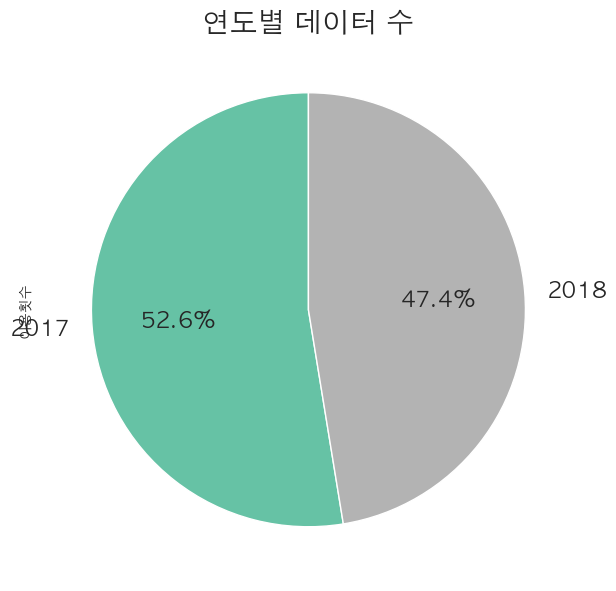

In [13]:
# 2017, 2018 카드 총액 비교 
# 카드 사용수, 카드 사용 총액 순으로 비교 

# 2017 & 2018 카드 사용 수 비교 
plt.figure(figsize = (7,8))
year_counts.plot.pie(autopct = '%1.1f%%', startangle = 90, cmap = "Set2", fontsize=16)
plt.title("연도별 데이터 수",  fontsize=20)
plt.show()

2017년도 53,031,890개 2018년도 47,842,165개

2017년도가 카드 총 사용 횟수 더 많음

In [14]:
# 2017, 2018 카트 사용 총액 비교 
yearly_total = df_1718.groupby('연도').sum().reset_index()
yearly_total.head()

,연도,이용자수,이용횟수,이용금액
0,2017,26847607,53031890,1940564662737
1,2018,23420907,47842165,1556250959824


##### 연도별 카드 사용총액

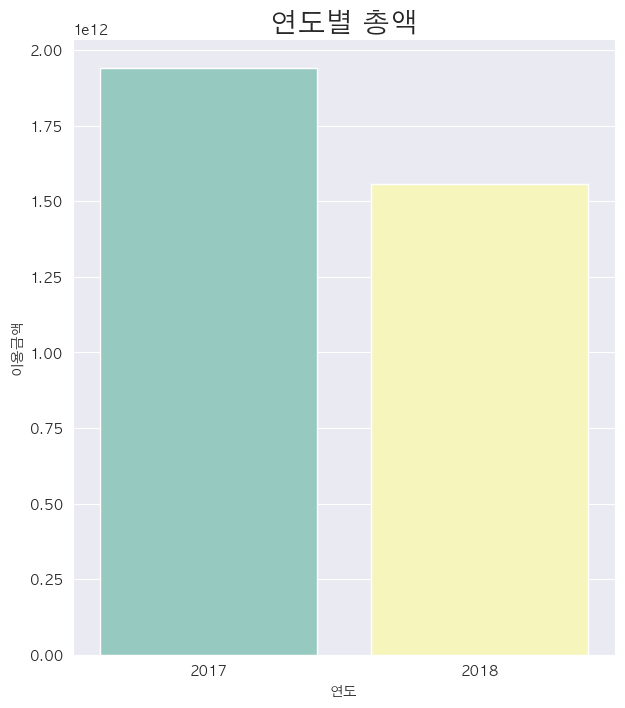

In [15]:
plt.figure(figsize = (7,8))
sns.barplot(data = yearly_total, x = '연도', y='이용금액',  palette = 'Set3')
plt.title("연도별 총액",  fontsize=20)
plt.show()


##### 월별 카드 사용액 

In [16]:
monthly_total = df_1718.groupby('연월').sum().reset_index()
monthly_total.head()

,연월,이용자수,이용횟수,이용금액
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090


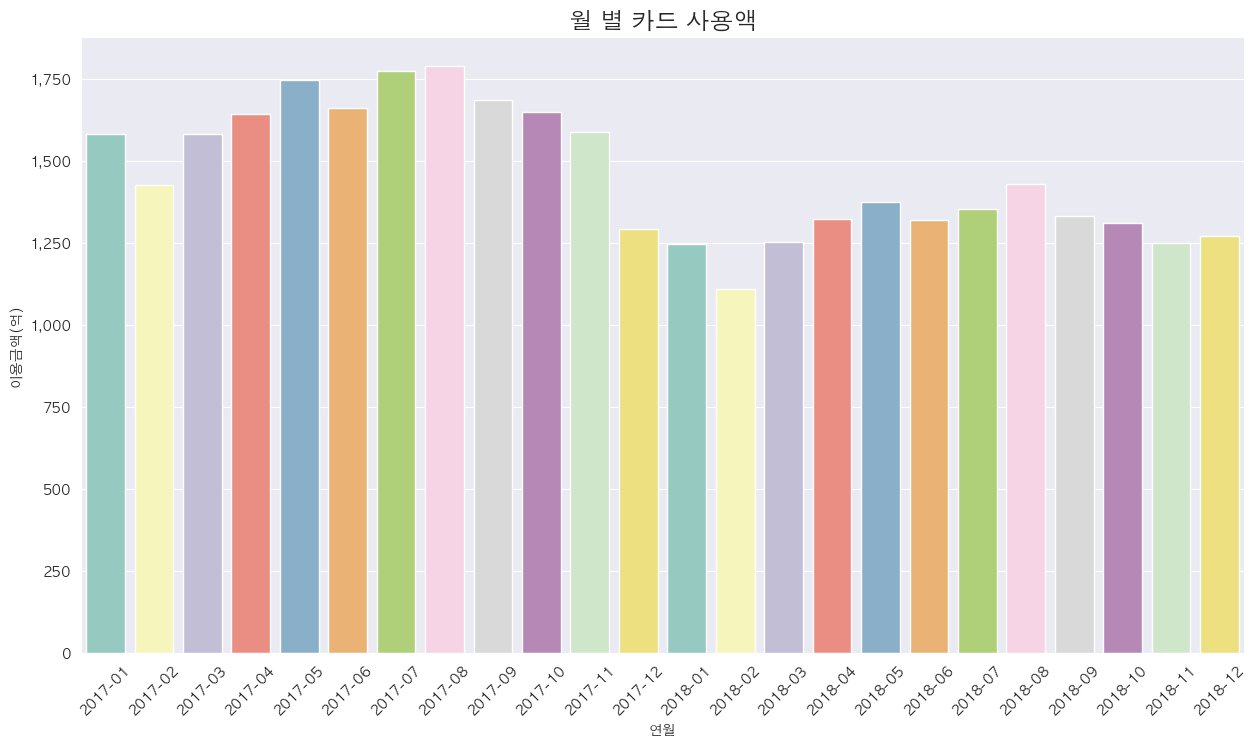

In [17]:
# 월별 카드 이용금액 
plt.figure(figsize = (15, 8))
sns.barplot(data = monthly_total, x = '연월', y ='이용금액', palette = "Set3")
plt.xticks(rotation = 45) # 45도 회전하기 
plt.title("월 별 카드 사용액", fontsize = 17)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
# gca()함수: lambda 함수로 y 축 값의 형식 정해주기 
# 소수점 아래 0자리 까지 표기하기 
# 1,500억 으로 표시 됨! 

plt.ylabel('이용금액(억)')
plt.show()

- 전체적으로 1,2월 소비금액이 적고 7,8월 이용금액이 높은 경향이 있다.
- 2018년도에 전체적인 이용금액이 적어졌다.
- 2017년도에 소비금액이 더 큰 이유가 무엇일까? 

#### 3-2. 연도별, 월별 금액 차이가 존재하는 이유가 무엇일까?


카드 소비가 적어진 업종, 연령층, 성별이 있는지 확인하자 

##### 연령대별 소비내역

In [41]:
# 2017-18 카드 소비가 적어진 연령층을 확인하기 
usebyage = df_1718.groupby(['연도', '연령대']).sum().reset_index()
usebyage

,연도,연령대,이용자수,이용횟수,이용금액
0,2017,20대,4347006,8615947,176570078165
1,2017,20대미만,185713,403969,4450994233
2,2017,30대,6184592,11858528,344692777529
3,2017,40대,6069777,12663864,452445421492
4,2017,50대,4495433,9043516,384068677480
5,2017,60대이상,2227461,4264478,208534141777
6,2018,20대,4262563,8714136,175770246392
7,2018,20대미만,216056,475236,5027234286
8,2018,30대,5759053,11372820,320955678476
9,2018,40대,6081331,12925032,442123304148


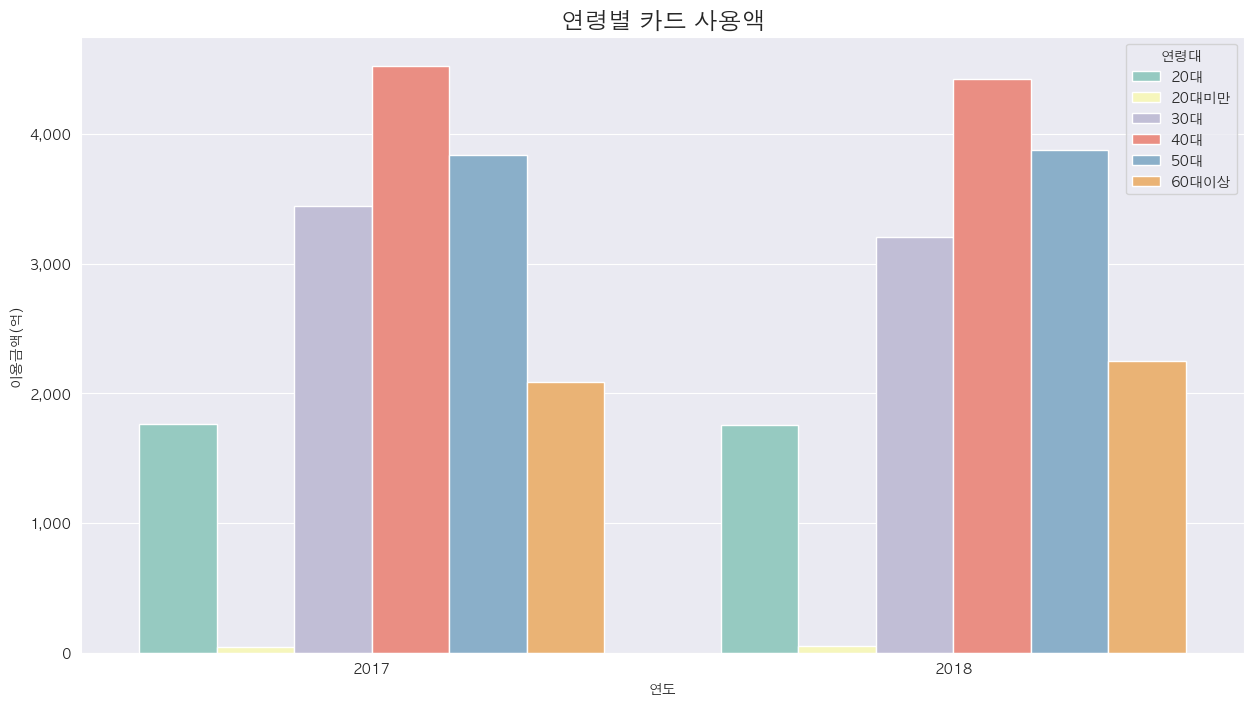

In [43]:
# 월별 카드 이용금액  
plt.figure(figsize = (15, 8))
sns.barplot(data = usebyage, x = '연도', y ='이용금액', palette = "Set3", hue ='연령대')
plt.title("연령별 카드 사용액", fontsize = 17)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 
plt.ylabel('이용금액(억)')

plt.show()

- 전체적인 소비가 낮아졌음 
- 유난히 소비가 적어진 연령층은 없음

##### 관광객/ 제주도민의 소비내역 

In [20]:
usebyuser = df_1718.groupby(['연도', '이용자 구분']).sum().reset_index()
usebyuser.head()

,연도,이용자 구분,이용자수,이용횟수,이용금액
0,2017,내국인관광객,12761026,20113119,754434825907
1,2017,제주도민,14086581,32918771,1186129836830
2,2018,내국인관광객,11179654,17830178,633357078211
3,2018,제주도민,12241253,30011987,922893881613


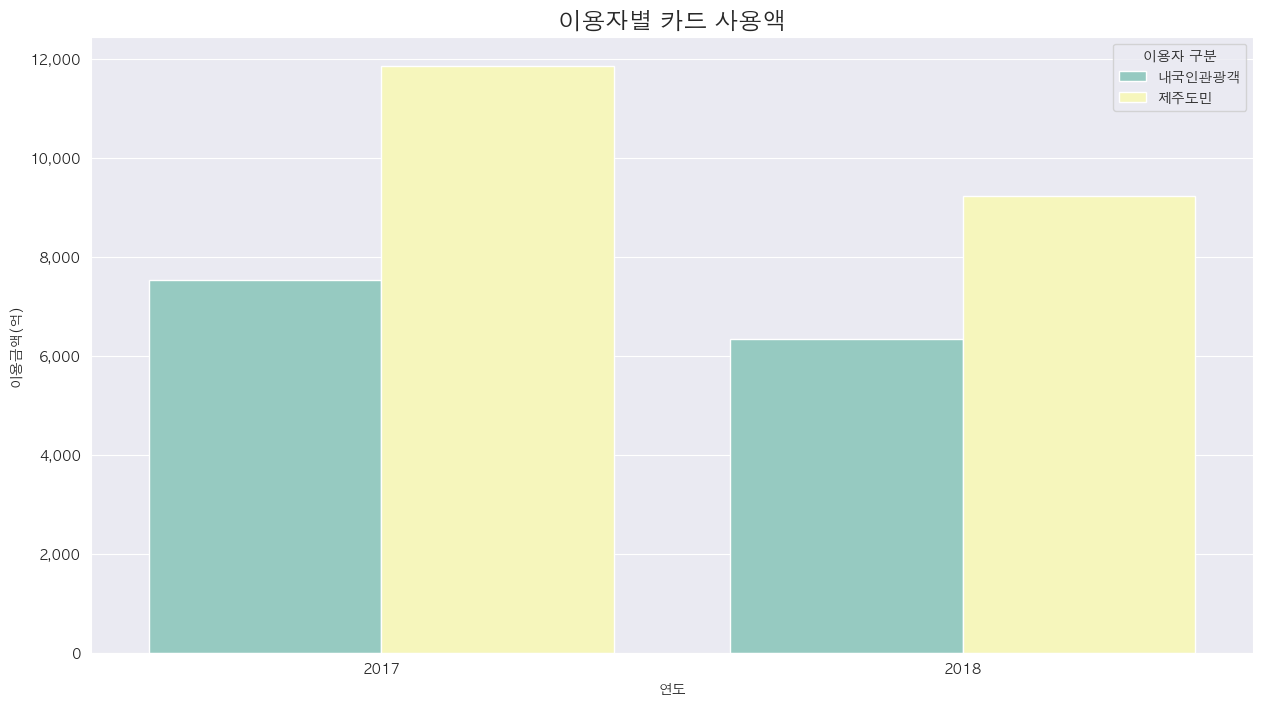

In [21]:
# 이용자별 카드 이용 금액 총액
plt.figure(figsize = (15, 8))
sns.barplot(data = usebyuser, x = '연도', y ='이용금액', palette = "Set3", hue = '이용자 구분')
plt.title("이용자별 카드 사용액", fontsize = 17)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 

plt.ylabel('이용금액(억)')
plt.show()

- 제주도민이 두 연도 모두 소비금액이 크게 차지함 

##### 업종별 소비 내역비교

In [22]:
usebybiz = df_1718.groupby(['연도', '업종명']).sum().reset_index()
usebybiz.head()

,연도,업종명,이용자수,이용횟수,이용금액
0,2017,교통,2633684,3722079,218699539949
1,2017,기타,3337625,6181588,369802572061
2,2017,문화/레져,1166072,1586218,68738522691
3,2017,소매,2543030,3557900,214293310855
4,2017,쇼핑,7840104,21230344,472376164231


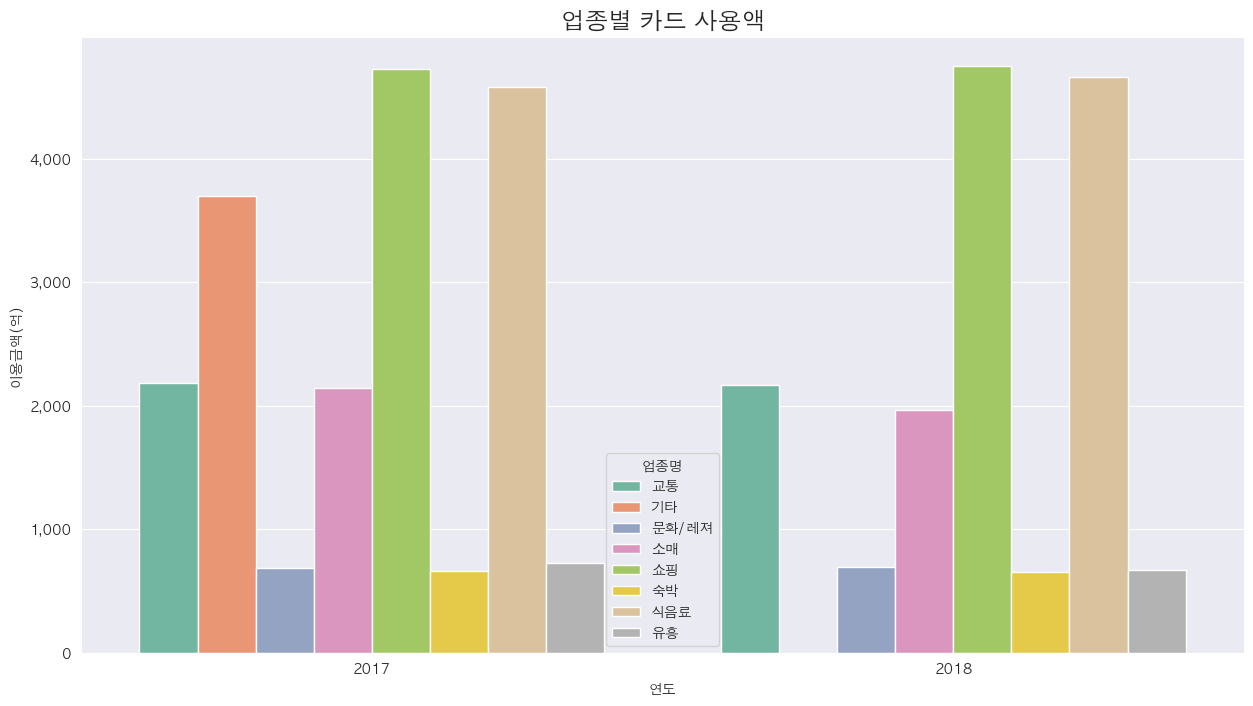

In [23]:
# 이용자별 카드 이용 금액 총액
plt.figure(figsize = (15, 8))
sns.barplot(data = usebybiz, x = '연도', y ='이용금액', palette = "Set2", hue = '업종명')
plt.title("업종별 카드 사용액", fontsize = 17)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 

plt.ylabel('이용금액(억)')
plt.show()

- 2018년도에는 기타 업종의 소비내역이 전혀 없음. 

In [45]:
df[df['업종명'] == '기타']['연월'].unique()

array(['2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06',
       '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12',
       '2016-11', '2016-10', '2016-09'], dtype=object)

- 2018년도의 데이터가 없음을 확인할 수 있음
- 2018년도의 기타 업종의 소비금액이 누락됨 or 통계치가 없음 
- 2017년도의 기타 업종을 제외하고 분석! 하기

#### 3-3. "기타"업종 누락 처리

In [25]:
df_1718 = df_1718[df_1718['업종명'] != '기타']

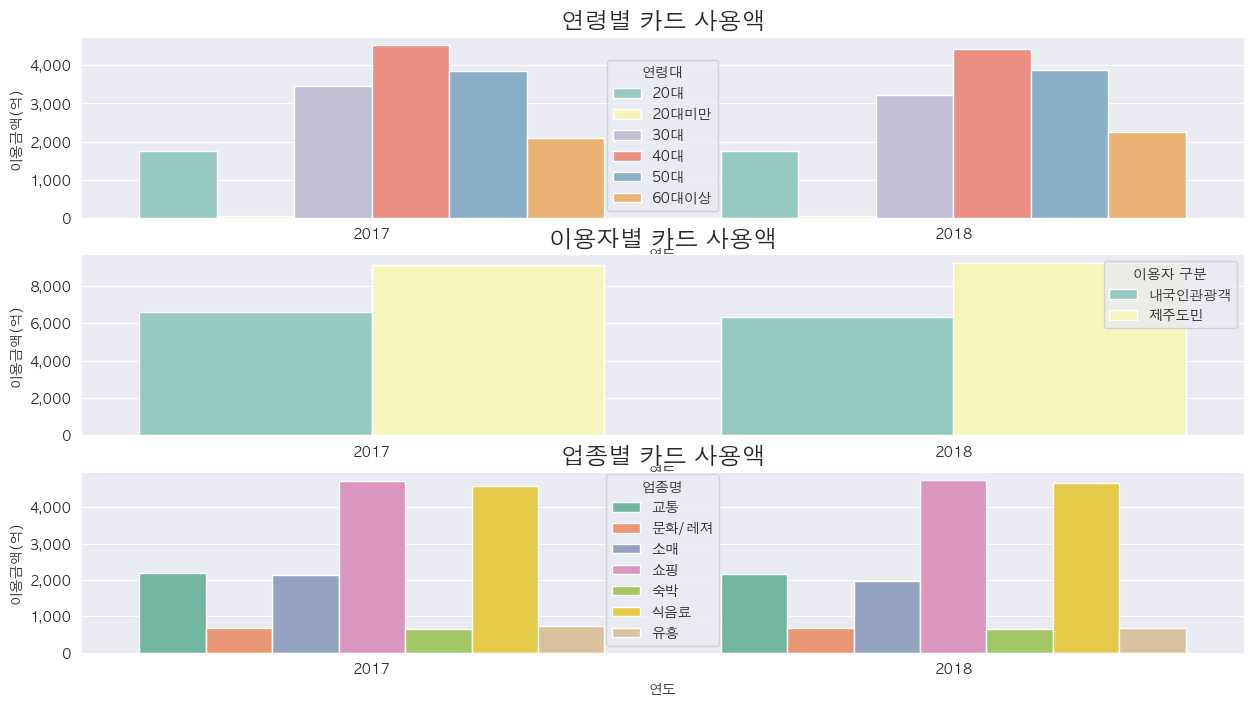

In [26]:
# 같은 작업 시행 subplot으로
plt.figure(figsize = (15, 8))

plt.subplot(3,1,1)
usebyage = df_1718.groupby(['연도', '연령대']).sum().reset_index()
sns.barplot(data = usebyage, x = '연도', y ='이용금액', palette = "Set3", hue ='연령대')
plt.title("연령별 카드 사용액", fontsize = 17)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 
plt.ylabel('이용금액(억)')

plt.subplot(3,1,2)
usebyuser = df_1718.groupby(['연도', '이용자 구분']).sum().reset_index()
sns.barplot(data = usebyuser, x = '연도', y ='이용금액', palette = "Set3", hue = '이용자 구분')
plt.title("이용자별 카드 사용액", fontsize = 17)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 
plt.ylabel('이용금액(억)')


plt.subplot(3,1,3)
usebybiz = df_1718.groupby(['연도', '업종명']).sum().reset_index()
sns.barplot(data = usebybiz, x = '연도', y ='이용금액', palette = "Set2", hue = '업종명')
plt.title("업종별 카드 사용액", fontsize = 17)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}')) 
plt.ylabel('이용금액(억)')

plt.show()

- 전체적인 경향이 비슷한것을 확인할 수 있다!

#### 3-4. 연령대별 이용 금액 

##### 연령대 차지 비율

In [48]:
usebyage = df_1718.groupby('연령대').sum().reset_index()

<Figure size 1500x800 with 0 Axes>

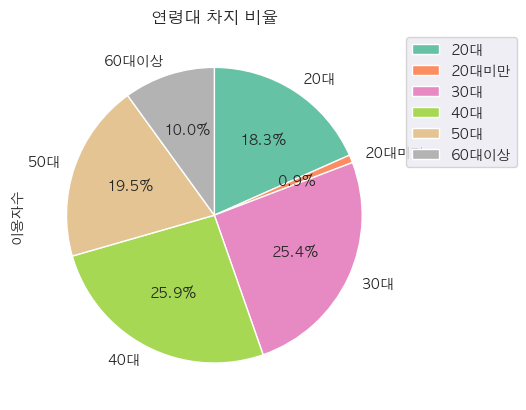

In [51]:
# 파이차트 
plt.figure(figsize=(15,8))
usebyage.plot.pie(y ='이용자수', labels = usebyage['연령대'], autopct = '%.1f%%', startangle = 90,counterclock = False,  cmap = "Set2", fontsize = 10)
# counterclock = False 시계 방향 회전 
plt.title('연령대 차지 비율')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

- 30대, 40대의 차지 비율 큼

##### 연령대별 소비금액 차지비율

<Figure size 1500x800 with 0 Axes>

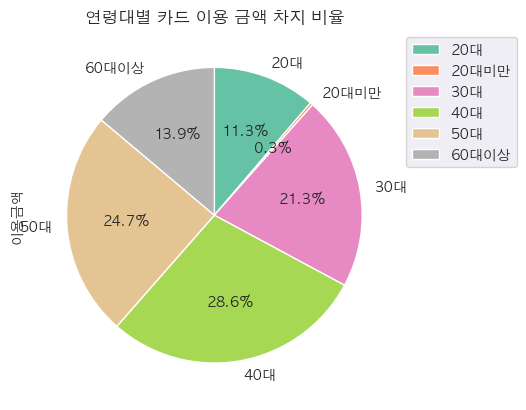

In [29]:
# 파이차트 
plt.figure(figsize=(15,8))
usebyage.plot.pie(y ='이용금액', labels = usebyage['연령대'], autopct = '%.1f%%', startangle = 90, counterclock = False,  cmap = "Set2", fontsize = 10)
# counterclock = False 시계 방향 회전 
plt.title('연령대별 카드 이용 금액 차지 비율')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

- 이용자수 비율과 비교하자면, 50-60대가 소비금액 차지 비율이 더 큰 것을 알 수 있음 
- 연령대별 1인당 사용금액을 확인해보자

##### 1인당 소비금액

In [30]:
usebyage['1인당 이용금액'] = usebyage['이용금액'] / usebyage['이용자수']

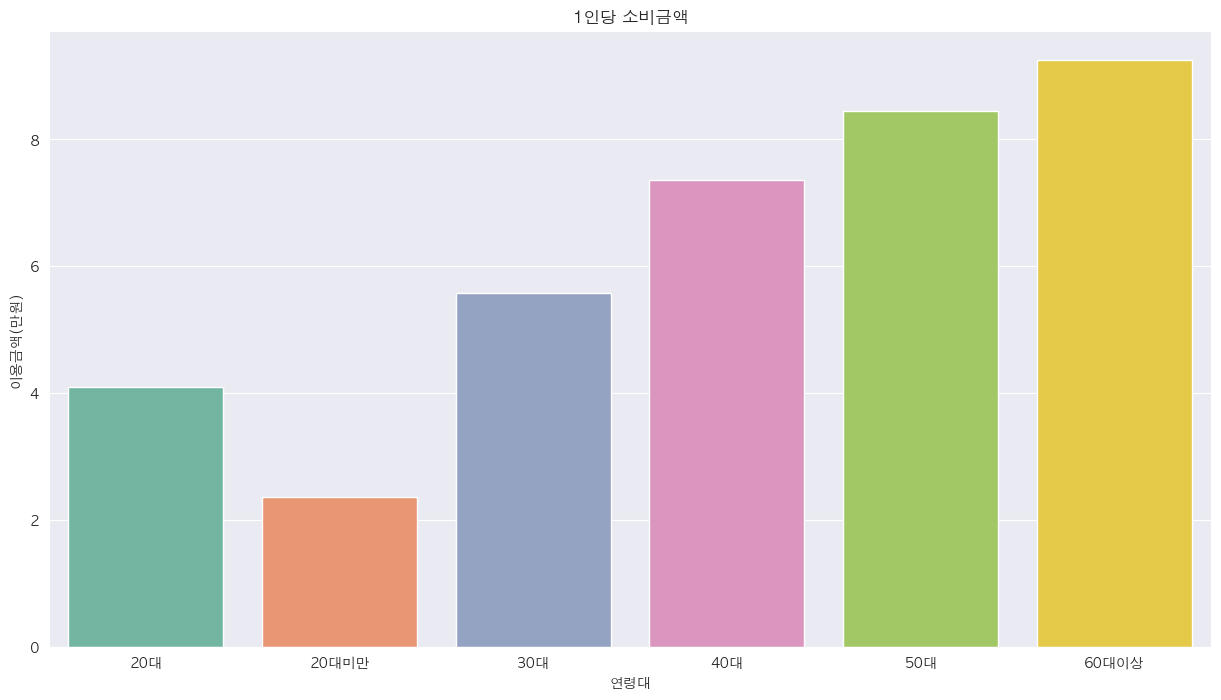

In [31]:
# 1인당 소비금액 barplot

plt.figure(figsize=(15,8))
sns.barplot(data = usebyage, x = '연령대', y = '1인당 이용금액', palette = 'Set2')
plt.title('1인당 소비금액')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))
plt.ylabel('이용금액(만원)')

plt.show()

##### 연령대별 업종 소비 금액 
연령대별로 어느 업종에서 소비하는지 확인하자

In [32]:
agebybiz = df_1718.groupby(['연령대', '업종명']).sum().reset_index()
agebybiz['1인당 이용금액'] = agebybiz['이용금액'] / agebybiz['이용자수']
agebybiz.head()

,연령대,업종명,이용자수,이용횟수,이용금액,1인당 이용금액
0,20대,교통,691799,832507,45278277733,65450.047966
1,20대,문화/레져,450991,749958,12465321269,27639.844851
2,20대,소매,832913,1125058,37445127141,44956.828794
3,20대,쇼핑,3000168,8049427,102068652646,34020.979041
4,20대,숙박,189642,232654,13115450664,69158.997817


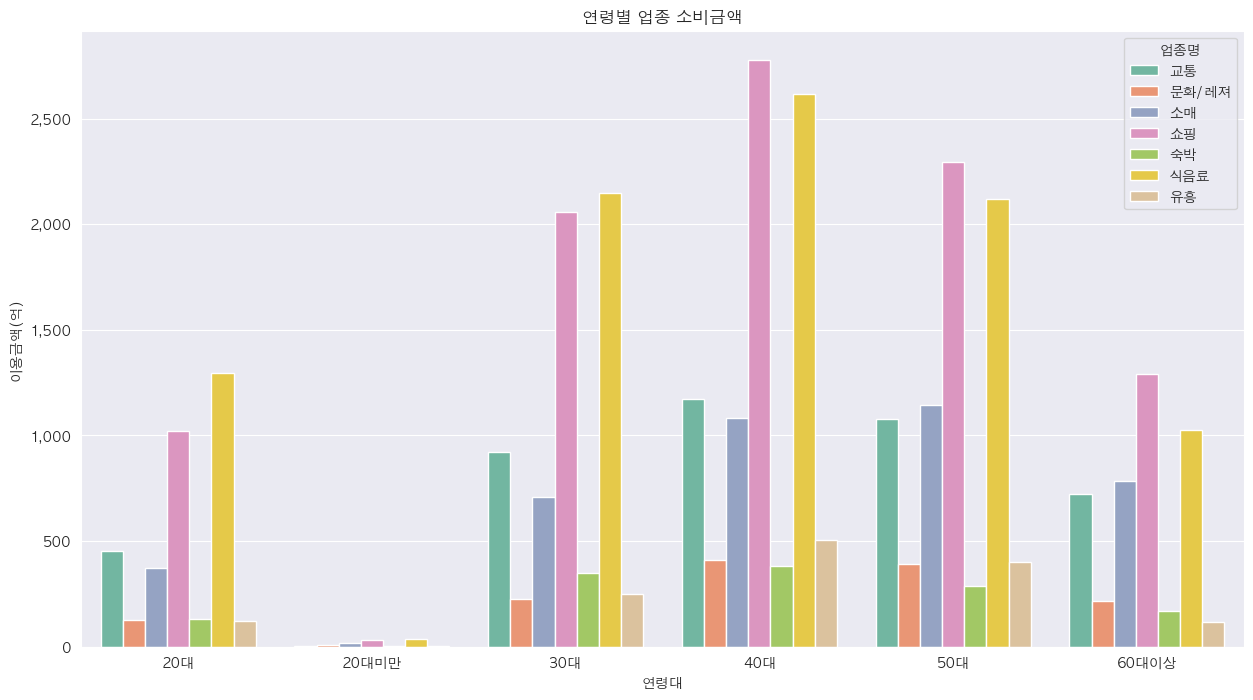

In [33]:
# 연령대별 업종 소비 비율 barplot
plt.figure(figsize=(15,8))
sns.barplot(data=agebybiz, x = '연령대', y = '이용금액', palette = 'Set2', hue = '업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.title('연령별 업종 소비금액')

plt.show()

- 전체적으로 모든 연령층이 쇼핑, 식음료에서 가장 높은 금액을 소비함 
- 유흥은 40대에서 가장 높은 비율을 차지하고 50->60대에서 급격히 감소 

##### 1인당 업종별 소비금액 

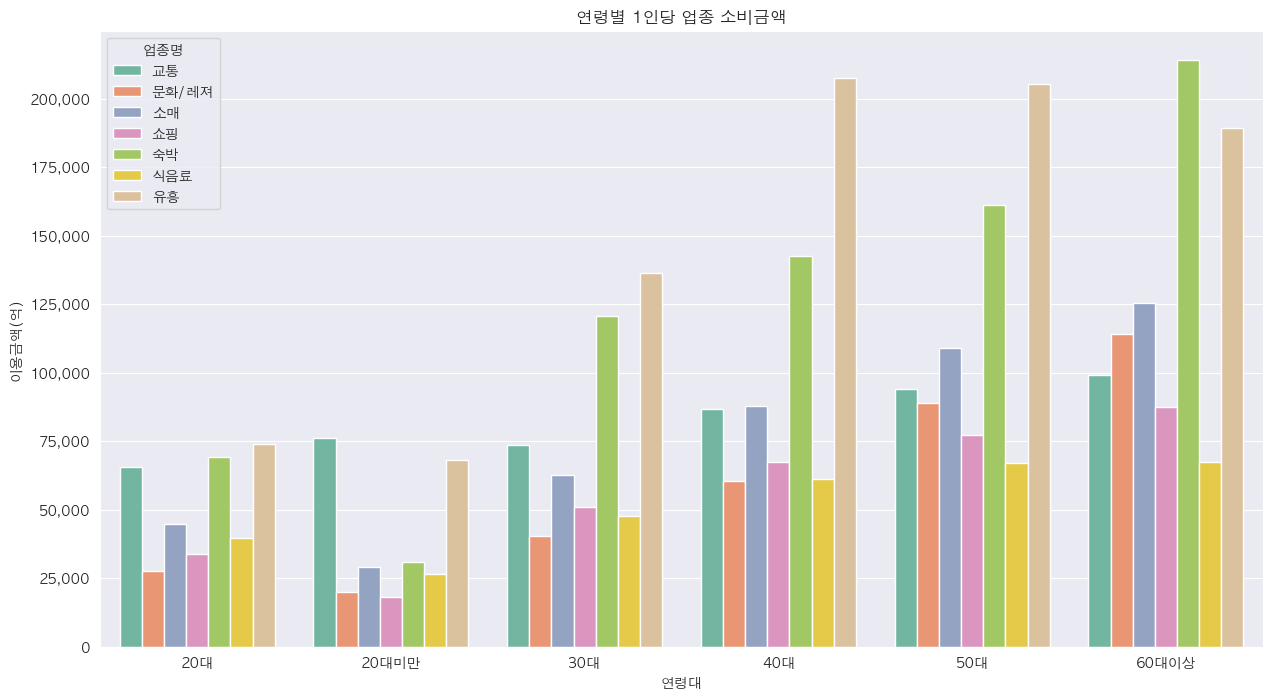

In [34]:
# 연령대별 1인당 업종 소비 비율 barplot
plt.figure(figsize=(15,8))
sns.barplot(data=agebybiz, x = '연령대', y = '1인당 이용금액', palette = 'Set2', hue = '업종명')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.ylabel('이용금액(억)')
plt.title('연령별 1인당 업종 소비금액')

plt.show()

##### 연령대별 월 소비금액 

In [35]:
# 연령대별 월 소비금액 
agebymonth = df_1718.groupby(['연령대', '연월']).sum().reset_index()
agebymonth.head()

,연령대,연월,이용자수,이용횟수,이용금액
0,20대,2017-01,303652,585573,12684346312
1,20대,2017-02,326171,600822,12968232383
2,20대,2017-03,322261,657448,13449996720
3,20대,2017-04,326314,669205,13547356565
4,20대,2017-05,356899,725529,14686358471


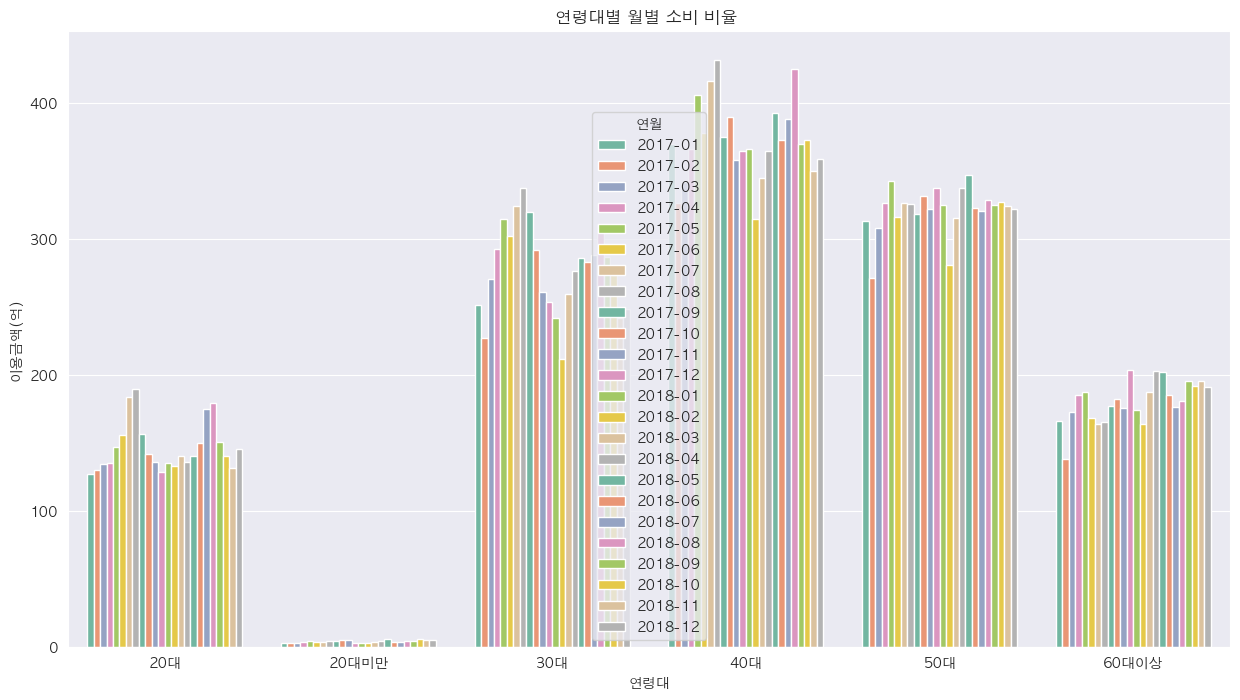

In [36]:
# 연령대별 월별 소비 비율 barplot
plt.figure(figsize=(15,8))
sns.barplot(data=agebymonth, x = '연령대', y = '이용금액', palette = 'Set2', hue = '연월')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('이용금액(억)')
plt.title('연령대별 월별 소비 비율 ')

plt.show()

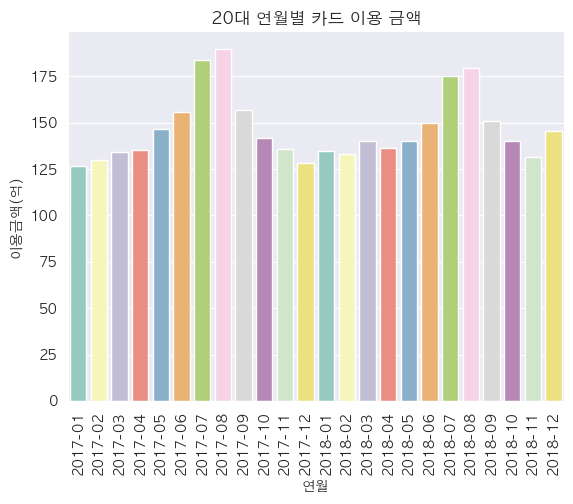

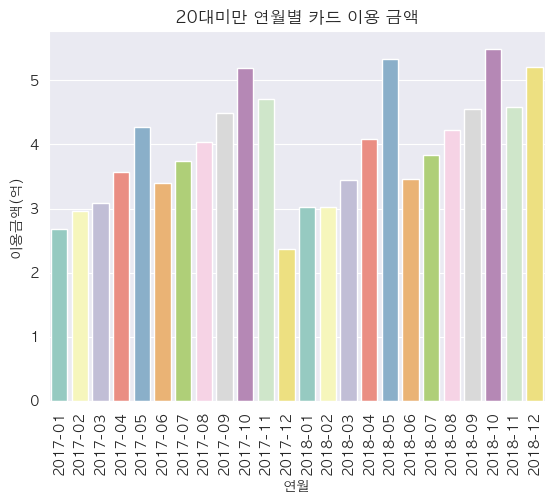

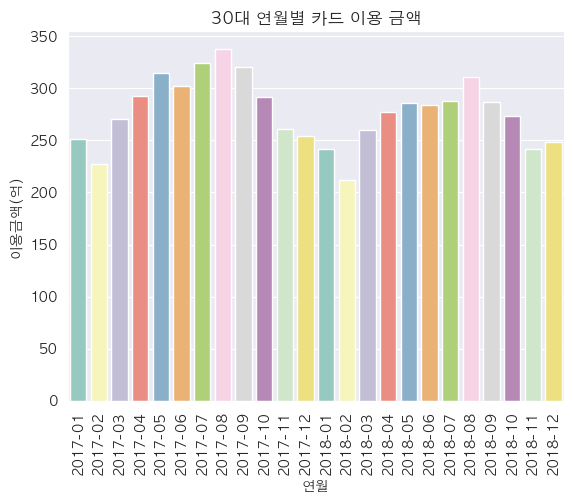

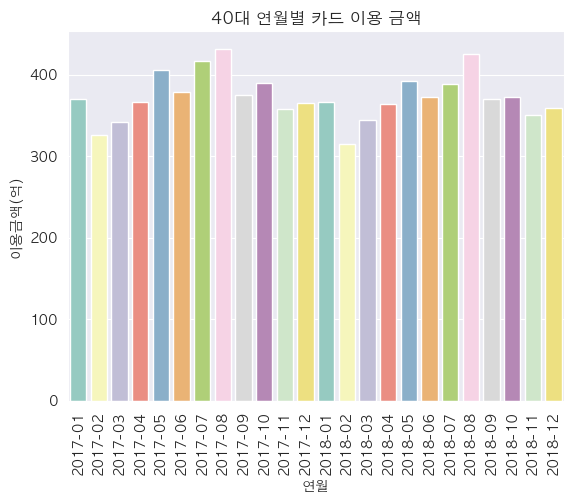

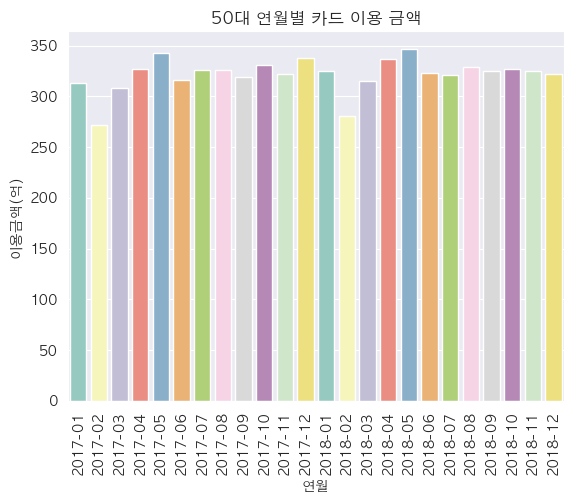

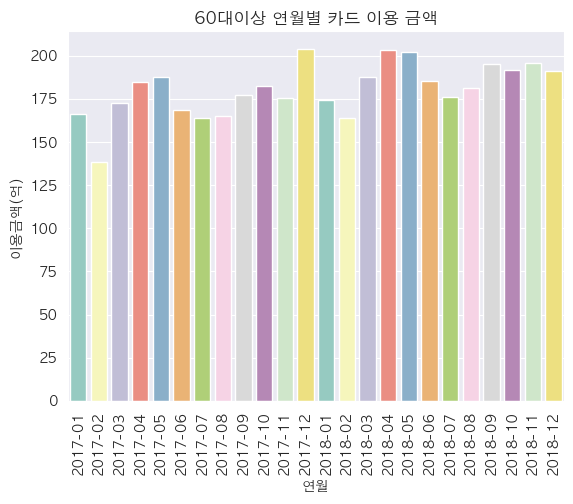

In [37]:
for age in agebymonth['연령대'].unique():
    data = agebymonth[agebymonth['연령대'] == age]
    sns.barplot(data=data, x='연월', y='이용금액', palette="Set3")
    plt.title(f'{age} 연월별 카드 이용 금액')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
    plt.ylabel('이용금액(억)')
    plt.show()


- 50대는 전체적으로 매 월 비슷한 소비 추이를 보임. 
- 60대는 다른 연령층과 다르게 7,8월에 소비 금액이 높지 않고, 4,5월에 소비 금액이 큰 경향을 보임
    

### 4. 결론

- 2018년도에 '기타'업종의 데이터가 누락되어 2017년, 2018년도의 카드 소비 총액에 간격이 있음을 확인할 수 있다.
- 20대 미만 소비층의 총 소비 금액이 다른 연령층보다 현저히 적다
- 20-40대 연령층은 월별로 비슷한 경향을 보임 
- 50대는 전반적으로 매 월에 비슷한 소비 경향을 보임 
- 60대는 성수기가 아닌 비수기(4,5월)에 높은 소비를 나타냄